In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic.api import TabularMagic
from tabularmagic.api.mlR import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR)
from tabularmagic.api.mlC import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.3, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test datasets: (1022, 80), (438, 
      80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1022, 80)                  Test shape: (438, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, 
  LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, 
  RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, 
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
  BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, 
  Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 
  PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, 
  YearRemodAdd, Mas

In [3]:
tm.eda('all').categorical_summary_statistics()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
least_common,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRAe,2fmCon,2.5Fin,Shed,Metal,CBlock,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,Mix,Fa,Sev,Po,2Types,Fin,Ex,Ex,P,Ex,MnWw,TenC,Con,AdjLand
n_missing,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,872,0,0,0,37,37,38,37,38,0,0,0,1,0,0,690,81,81,81,81,0,1453,1179,1406,0,0
missing_rate,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59726,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.026027,0.0,0.0,0.0,0.000685,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.055479,0.0,0.995205,0.807534,0.963014,0.0,0.0
n,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


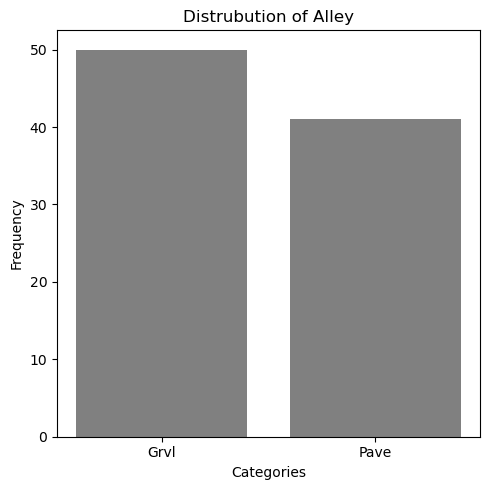

In [9]:
tm.eda('all').plot_distribution('Alley')

In [10]:
tm.eda('all').continuous_summary_statistics()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,20.000000,21.000000,1.300000e+03,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,3.490000e+04
max,190.000000,313.000000,2.152450e+05,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,7.550000e+05
mean,56.897260,70.049958,1.051683e+04,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,1.809212e+05
std,42.300571,24.284752,9.981265e+03,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,7.944250e+04
variance,1789.338306,589.749169,9.962565e+07,1.912679,1.238322,912.215413,426.232822,32784.971168,208025.468469,26023.907779,195246.406179,192462.361709,149450.079204,190557.075337,2364.204048,276129.633363,0.269268,0.057003,0.303508,0.252894,0.665494,0.048549,2.641903,0.415595,609.582509,0.558480,45712.510229,15709.813370,4389.861203,3735.550326,859.505871,3108.889359,1614.215993,246138.055397,7.309595,1.763837,6.311111e+09
skew,1.406210,2.160866,1.219514e+01,0.216721,0.692355,-0.612831,-0.503044,2.666326,1.683771,4.250888,0.919323,1.522688,1.375342,0.812194,9.002080,1.365156,0.595454,4.099186,0.036524,0.675203,0.211572,4.483784,0.675646,0.648898,-0.648708,-0.342197,0.179796,1.539792,2.361912,3.086696,10.293752,4.117977,14.813135,24.451640,0.211835,0.096170,1.880941e+00
kurtosis,1.570675,17.375300,2.025438e+02,0.091857,1.098521,-0.442155,-1.271999,10.043602,11.076090,20.040415,0.469262,13.201042,5.722076,-0.555677,82.945932,4.874266,-0.840334,16.336436,-0.858217,-1.077349,2.219135,21.454627,0.873641,-0.220601,-0.421174,0.216135,0.909823,2.978604,8.457180,10.390972,123.235177,18.371874,222.500507,698.600840,-0.406834,-1.190634,6.509812e+00
q1,20.000000,59.000000,7.553500e+03,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.299750e+05
median,50.000000,69.000000,9.478500e+03,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.630000e+05


In [11]:
tm.eda('all').specific('Street').counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

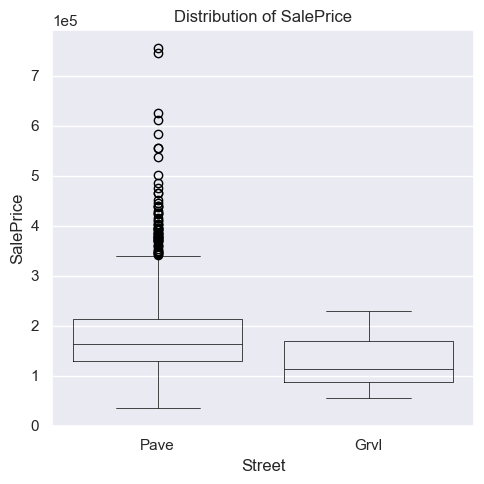

In [4]:
tm.eda('all').plot_distribution_stratified('SalePrice', 'Street', 'box')

In [5]:
tm.datahandler().load_data_checkpoint()
tm.datahandler().drop_highly_missing_vars(
    threshold=0.5
).impute(
    continuous_strategy='mean',
    categorical_strategy='most_frequent'
).scale(
    strategy='standardize'
).save_data_checkpoint('finished preprocessing')
tm.datahandler().head()

INFO: Working datasets reset to original datasets. Shapes of train, test 
      datasets: (1022, 80), (438, 80). 
INFO: Dropped variables Fence, PoolQC, Alley, MasVnrType, MiscFeature with more 
      than 50.0% missing values. 
INFO: Scaled variables MSSubClass, LotFrontage, LotArea, OverallQual, 
      OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, 
      BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, 
      BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, 
      KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, 
      GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, 
      ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice using strategy 
      "standardize". 
INFO: Saved working datasets checkpoint "finished preprocessing". 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
893,-0.868950,RL,-0.014695,-0.205881,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,-0.093513,2.194045,-0.260141,0.879717,Hip,CompShg,HdBoard,HdBoard,-0.609774,TA,TA,CBlock,TA,TA,No,GLQ,0.471617,Unf,-0.280335,-0.393065,-0.001718,GasA,TA,Y,SBrkr,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,TA,-0.334480,Typ,-0.943262,NaN,Attchd,-0.632077,RFn,-1.073062,-1.022939,TA,TA,Y,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,WD,Normal,-0.345616
1106,0.068942,RL,1.082558,0.133392,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.365574,-0.508624,0.748522,0.493933,Gable,CompShg,HdBoard,HdBoard,1.487282,Gd,TA,PConc,Ex,TA,Av,GLQ,1.274234,Unf,-0.280335,-0.314552,0.901672,GasA,Ex,Y,SBrkr,0.848218,1.742448,-0.120313,2.059040,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,1.506662,Typ,2.131743,TA,Attchd,0.617832,RFn,0.296063,1.127379,TA,TA,Y,0.671981,-0.253360,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,1.649546,WD,Normal,1.852130
414,-0.634477,RM,-0.563322,-0.157666,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,-0.823057,0.392266,-1.431491,-1.676106,Gable,CompShg,WdShing,Wd Shng,-0.609774,TA,TA,CBlock,TA,TA,No,Unf,-0.970484,Unf,-0.280335,0.979790,-0.115759,GasA,Gd,Y,FuseA,-0.364028,-0.802294,-0.120313,-0.944472,-0.814295,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,TA,-0.948194,Typ,0.594240,Gd,Detchd,-2.083584,Unf,0.296063,-0.562156,TA,TA,Y,-0.741099,-0.715974,1.767303,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,1.649546,WD,Normal,-0.854771
523,-0.165531,RM,-0.798448,-0.507359,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,-0.093513,1.293156,-0.780741,-1.676106,Gable,CompShg,CemntBd,CmentBd,-0.609774,TA,Gd,CBlock,TA,TA,No,ALQ,-0.102613,Unf,-0.280335,0.075769,-0.124704,GasA,Ex,Y,SBrkr,-0.425667,0.694613,-0.120313,0.253918,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,TA,0.279234,Typ,2.131743,Gd,Detchd,-1.156232,Unf,0.296063,-0.274167,TA,TA,Y,-0.741099,-0.369014,0.238954,-0.119317,-0.275896,-0.069193,-0.122987,1.372691,-1.368961,WD,Normal,-0.287611
1037,-0.868950,RL,0.729870,0.190085,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,2.095118,-0.508624,1.171509,1.120833,Hip,CompShg,VinylSd,VinylSd,-0.204266,Gd,TA,PConc,Ex,TA,Gd,GLQ,1.252482,Unf,-0.280335,0.060067,1.252742,GasA,Ex,Y,SBrkr,1.156417,-0.802294,-0.120313,0.171011,1.112115,-0.247663,0.767840,-0.758517,-1.098297,-0.212318,Ex,-0.334480,Typ,0.594240,Ex,Attchd,1.182307,Fin,1.665189,2.087343,TA,TA,Y,0.991063,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,0.995164,0.894920,WD,Normal,1.729675


In [6]:
tm.datahandler().load_data_checkpoint('finished preprocessing')
tm.eda('all').categorical_summary_statistics()

INFO: Working datasets reset to checkpoint "finished preprocessing". Shapes of 
      train, test datasets: (1022, 75), (438, 75). 


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6
most_common,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
least_common,C (all),Grvl,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRAe,2fmCon,2.5Fin,Shed,Metal,CBlock,Other,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,Mix,Fa,Sev,Po,2Types,Fin,Ex,Ex,P,Con,AdjLand
n_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,37,38,37,38,0,0,0,1,0,0,690,81,81,81,81,0,0,0
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.026027,0.0,0.0,0.0,0.000685,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.055479,0.0,0.0,0.0
n,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


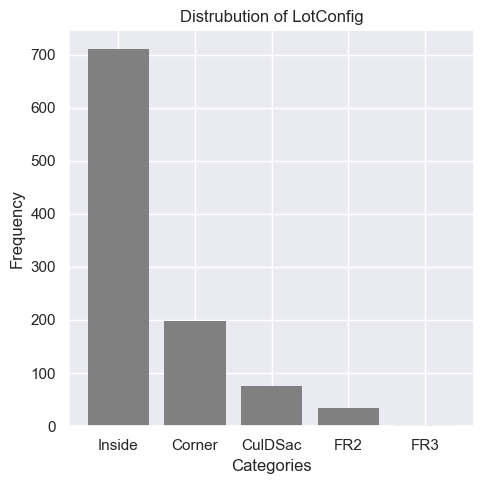

In [7]:
tm.eda().plot_distribution('LotConfig')

In [8]:
report = tm.ml_classification(
    models=[
        LinearC(type='no_penalty'),
        LinearC(type='l2'),
        # LinearC(type='elasticnet')
    ],
    outer_cv=3,
    y_var='CentralAir',
    X_vars=['LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'SalePrice']
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l2). 
INFO: Fitted model LinearC(l2). 


In [9]:
report.get_model_report('LinearC(no_penalty)').train_report().fit_statistics_by_class()

LinearC(no_penalty)_train_cv
Class Statistic                                
N     accuracy                         0.913434
      f1                               0.300337
      n                              277.333333
      precision                        0.465079
      recall                           0.223333
      roc_auc(ovr)                          NaN
Y     accuracy                         0.913434
      f1                               0.953818
      n                              277.333333
      precision                        0.932423
      recall                           0.976246
      roc_auc(ovr)                          NaN

In [10]:
tm.datahandler().load_data_checkpoint('finished preprocessing')
report = tm.ml_regression(
    models=[
        LinearR(type='ols'),
        LinearR(type='l2'), 
        # RobustLinearR(type='huber'),
        # RobustLinearR(type='ransac'),
        # SVMR(type='linear'),
        # MLPR(),
        # TreeEnsembleR(type='adaboost'),
    ],
    y_var='SalePrice',
    X_vars=['LotFrontage', 'LotArea', 'SaleCondition'], 
    outer_cv=5
)

INFO: Working datasets reset to checkpoint "finished preprocessing". Shapes of 
      train, test datasets: (1022, 75), (438, 75). 
INFO: Fitting model LinearR(ols). 
INFO: Fitted model LinearR(ols). 
INFO: Fitting model LinearR(l2). 
INFO: Fitted model LinearR(l2). 


In [11]:
report.fit_statistics('test')

,LinearR(ols)_test,LinearR(l2)_test
Statistic,,
rmse,74670.363952,77954.8306
mad,53961.798436,56099.668066
pearsonr,0.560246,0.545872
spearmanr,0.551487,0.512808
r2,0.287703,0.223662
adjr2,0.273891,0.208608
n,369,369


In [12]:
report.cv_fit_statistics()

LinearR(ols)_train_cv LinearR(l2)_train_cv
Fold Statistic                                           
0    rmse               69356.922969         72625.540853
     mad                53337.449091          55124.88749
     pearsonr               0.554651             0.529028
     spearmanr              0.548352             0.489434
     r2                     0.292174             0.223886
     adjr2                  0.260615             0.189282
     n                           165                  165
1    rmse               58541.905102         58473.305728
     mad                46850.069462         47293.599225
     pearsonr               0.366188             0.368325
     spearmanr               0.38439             0.342091
     r2                     0.102502             0.104604
     adjr2                   0.06348             0.065674
     n                           169                  169
2    rmse               76217.610804         76158.707089
     mad                50719.769757         53259.036067
     pearsonr               0.420595             0.363179
     spearmanr              0.512243             0.459869
     r2                     0.106634             0.108015
     adjr2                  0.067792             0.069233
     n                           169                  169
3    rmse                94067.70365         91139.256022
     mad                51669.876383         51448.957455
     pearsonr                0.42653             0.423618
     spearmanr              0.623181             0.624069
     r2                    -0.594623            -0.496883
     adjr2                  -0.66806            -0.565819
     n                           160                  160
4    rmse               86321.067721         88696.941178
     mad                58881.732617         60033.405235
     pearsonr               0.534947             0.597697
     spearmanr              0.594599             0.605766
     r2                     0.232509             0.189679
     adjr2                  0.199139             0.154447
     n                           169                  169

In [13]:
report['LinearR(ols)'].test_report().fit_statistics()

,LinearR(ols)_test
Statistic,
rmse,74670.363952
mad,53961.798436
pearsonr,0.560246
spearmanr,0.551487
r2,0.287703
adjr2,0.273891
n,369


In [14]:
report['LinearR(ols)'].train_report().cv_fit_statistics()

LinearR(ols)_train_cv
Fold Statistic                      
0    rmse               69356.922969
     mad                53337.449091
     pearsonr               0.554651
     spearmanr              0.548352
     r2                     0.292174
     adjr2                  0.260615
     n                           165
1    rmse               58541.905102
     mad                46850.069462
     pearsonr               0.366188
     spearmanr               0.38439
     r2                     0.102502
     adjr2                   0.06348
     n                           169
2    rmse               76217.610804
     mad                50719.769757
     pearsonr               0.420595
     spearmanr              0.512243
     r2                     0.106634
     adjr2                  0.067792
     n                           169
3    rmse                94067.70365
     mad                51669.876383
     pearsonr                0.42653
     spearmanr              0.623181
     r2                    -0.594623
     adjr2                  -0.66806
     n                           160
4    rmse               86321.067721
     mad                58881.732617
     pearsonr               0.534947
     spearmanr              0.594599
     r2                     0.232509
     adjr2                  0.199139
     n                           169